<a href="https://colab.research.google.com/github/WanjikuGithu/Housing-prices-prediction/blob/master/Week7IPipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regression Exercise on Housing Data**

**1. Defining the question**

**a.   Specifying the question**

To support a real estate company, the task is to study the factors affecting housing prices using data collected over time. Modelling that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables is also part of the process.


**b.   Defining the metrics for success**

The criteria for determining the suitability of the models will be evaluating the RMSEs for the following different methods:


*   Multiple Linear Regression
*   Quantile Regression
*   Ridge Regression
*   Lasso Regression
*   Elastic Net Regression



**c.   Recording the experimental design**

The following are the steps taken to complete analysis and prediction:



*   Reading and exploring the dataset
*   Checking for outliers and missing data
*   Performing univariate, bivariate and multivariate analysis
*   Performing regression analysis and checking for multicollinearity
*   Creating residual plots for the models and checking for hetereskedasticity using Bartlett's test









**2. Reading the data**

In [148]:
# Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy as sp
import statsmodels.regression.quantile_regression as Q_reg

from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

In [ ]:
# Reading the dataset
house = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')

**3. Checking the data**

In [ ]:
# Determining the number of records
house.shape

(21613, 20)

In [ ]:
# Viewing the top of our dataset
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Viewing the bottom of the dataset
house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Checking the datatypes
house.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# Checking for missing values
house.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# Dropping unnecessary columns
df = house.drop(['id'], axis=1)
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


**Checking for outliers using boxplots for every variable**

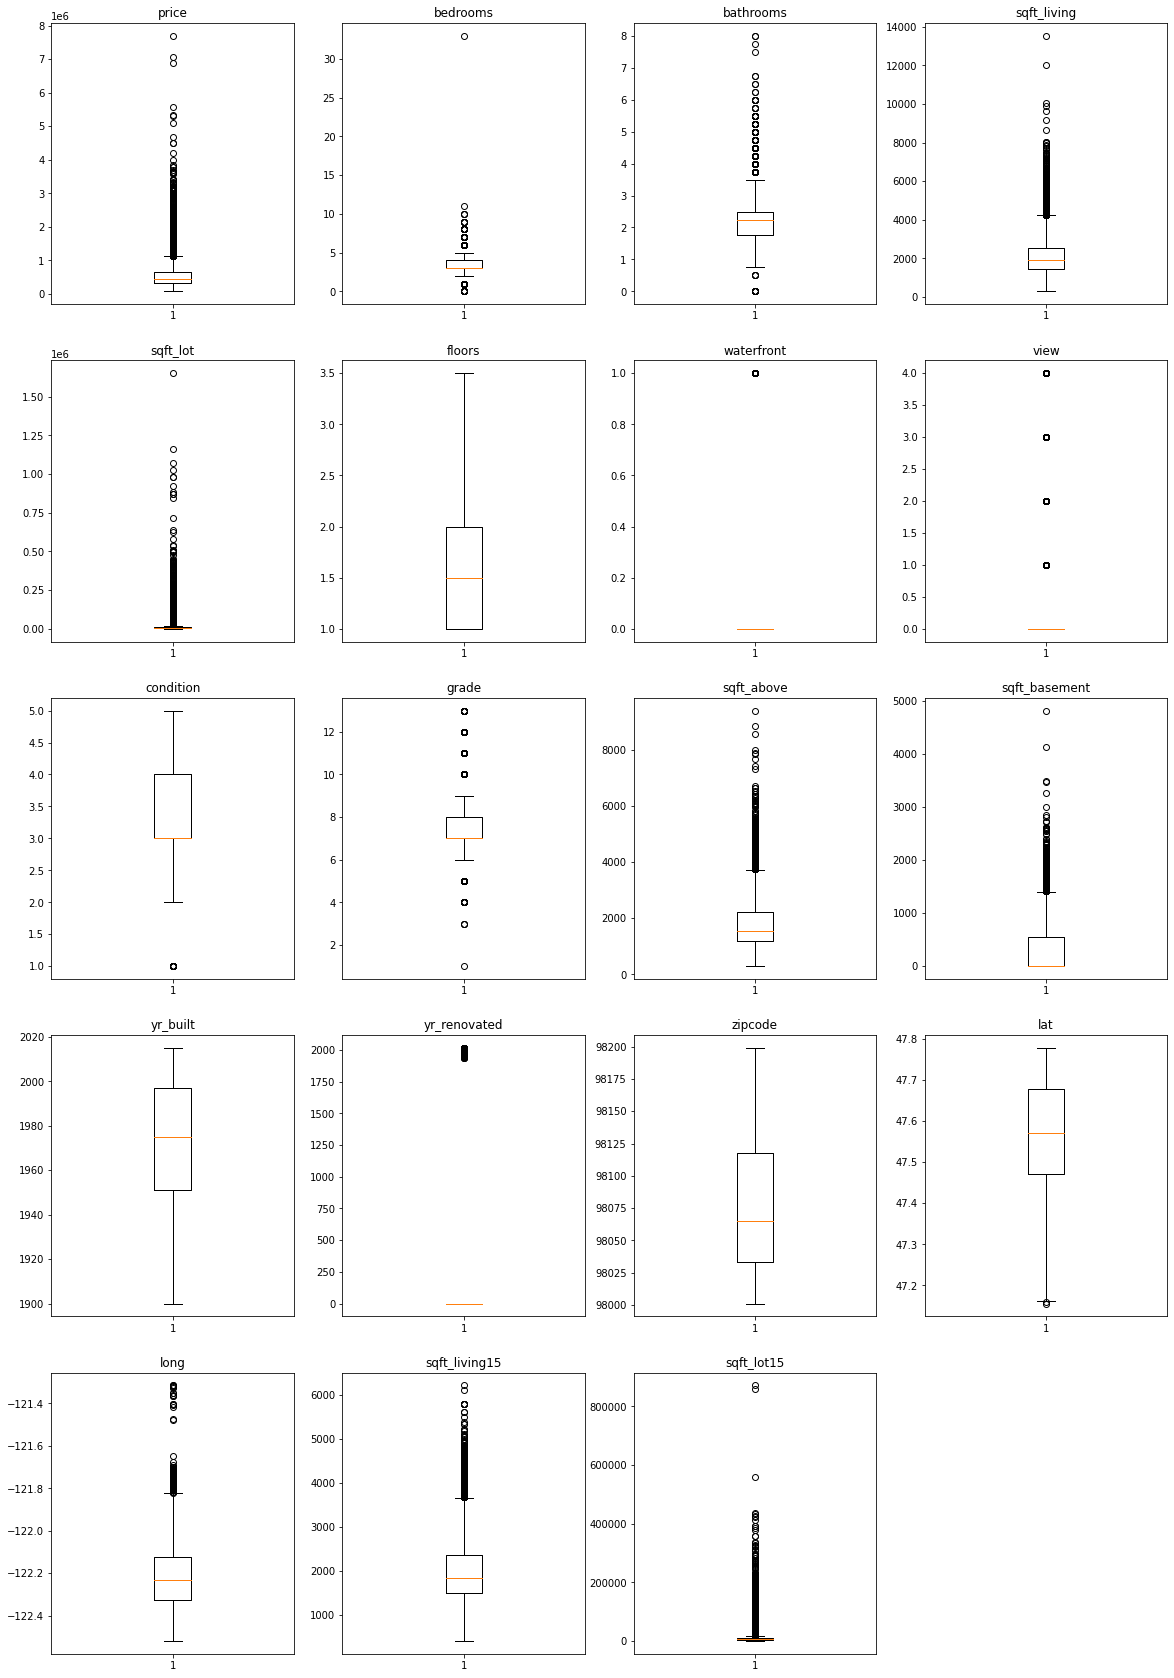

In [ ]:
# Saving the column names in a dictionary
columns_dict={'price': 1, 'bedrooms': 2, 'bathrooms': 3, 'sqft_living': 4, 
                   'sqft_lot': 5, 'floors': 6, 'waterfront': 7, 'view': 8, 'condition': 9, 
                   'grade': 10, 'sqft_above': 11, 'sqft_basement': 12, 'yr_built': 13, 'yr_renovated': 14, 'zipcode': 15, 
                   'lat': 16, 'long': 17, 'sqft_living15': 18, 
                   'sqft_lot15': 19}

plt.figure(figsize=(20,30))

# Making a boxplot for each numerical column
for column,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(df[column])
  plt.title(column)

plt.show()

In [ ]:
# Checking for duplicated values
df.duplicated().sum()

5

In [ ]:
# Removing duplicated values
df.drop_duplicates(keep=False,inplace=True)
df.shape 

(21603, 19)

Most of the columns have outliers but we'll work with them as they depict the recorded observations and are therefore viable

4. **Exploratory Data Analysis**

In [ ]:
# Determining the frequency count of the condition of the houses
df['condition'].value_counts()

3    14023
4     5677
5     1701
2      172
1       30
Name: condition, dtype: int64

In [ ]:
# Plotting univariate summaries
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


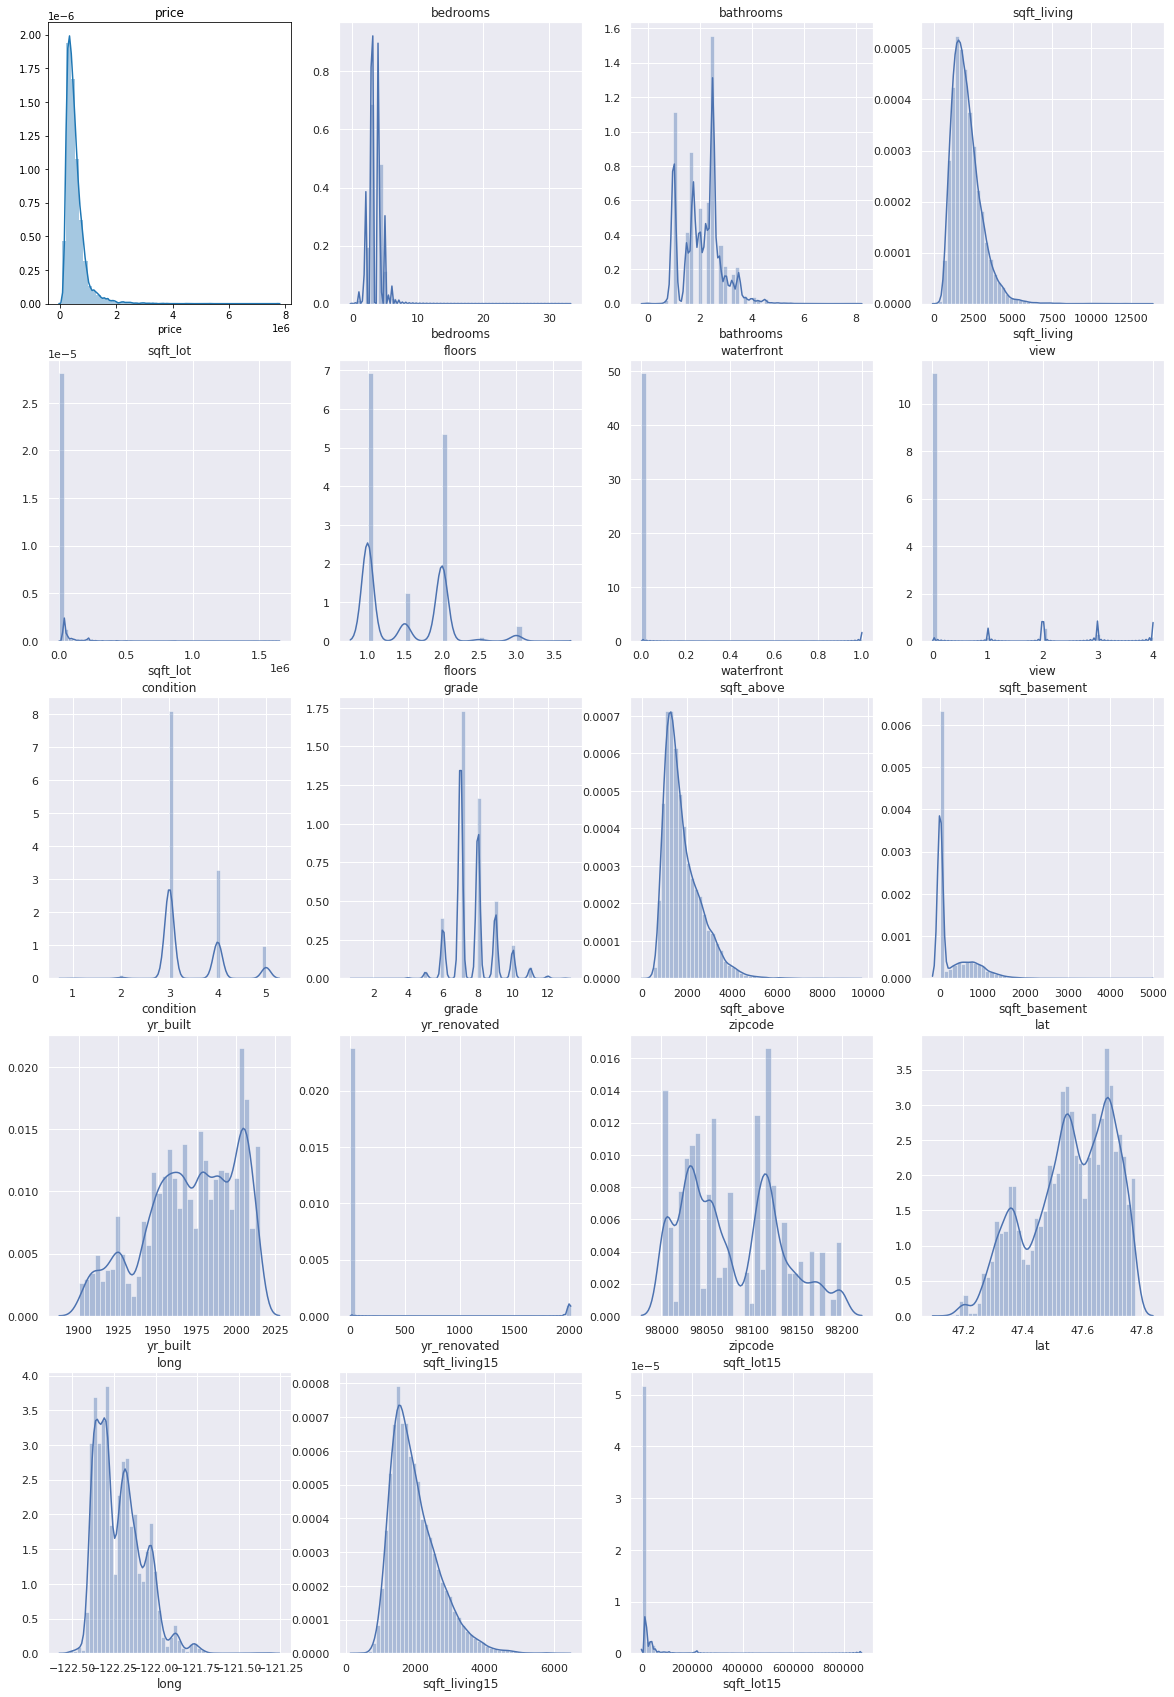

In [ ]:
# Plotting the histograms of every column to see the distributions of the data
columns_dict={'price': 1, 'bedrooms': 2, 'bathrooms': 3, 'sqft_living': 4, 
                   'sqft_lot': 5, 'floors': 6, 'waterfront': 7, 'view': 8, 'condition': 9, 
                   'grade': 10, 'sqft_above': 11, 'sqft_basement': 12, 'yr_built': 13, 'yr_renovated': 14, 'zipcode': 15, 
                   'lat': 16, 'long': 17, 'sqft_living15': 18, 
                   'sqft_lot15': 19}

plt.figure(figsize=(20,30) )

# make a histogram plot for each variable column
for variable,i in columns_dict.items():
  
  plt.subplot(5,4,i)
  sns.distplot(df[variable])
  sns.set(style='darkgrid')
  plt.title(variable)

plt.show()

In [ ]:
# Checking the correlation
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


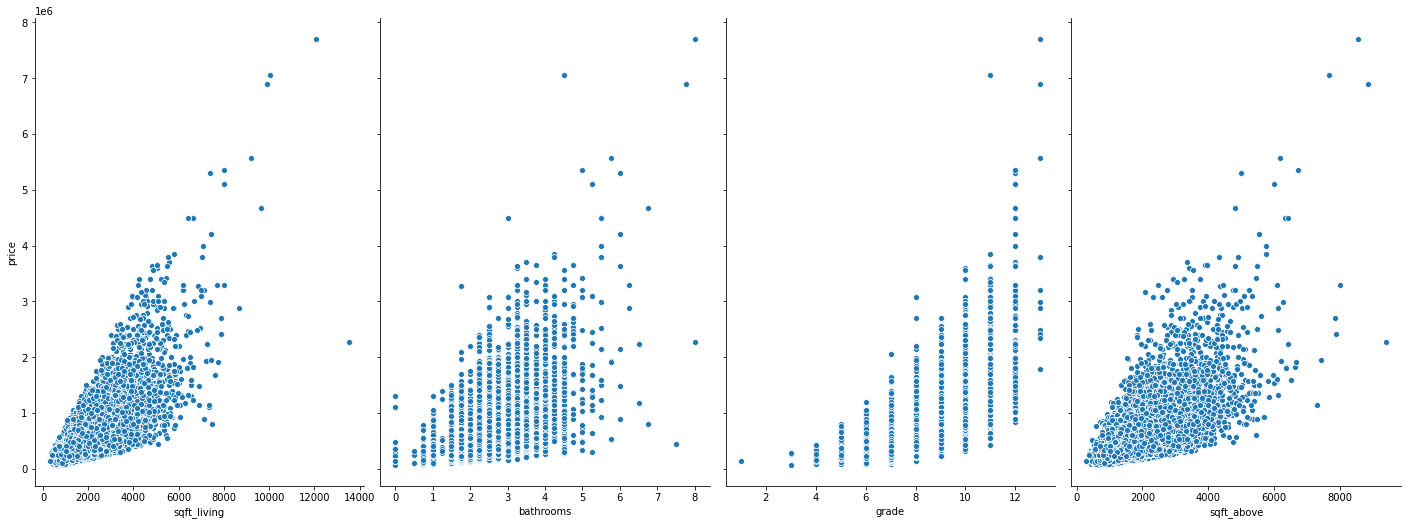

In [ ]:
# Scatterplot of some of the variables with higher correlation to housing prices
sns.pairplot(df, x_vars=['sqft_living','bathrooms','grade', 'sqft_above'], y_vars='price', height=7, aspect=0.7)


Slightly skewed distributions

**5. Implementing the solution**

**a. Multiple Linear Regression**

The following are assumptions for this regression method:

*   The relationship between the dependent and independent variables is linear
*   It assumes normality of the variables. Log transformation can be applied to those variables that are not normally didtributed 
*   There should be little or no multicollinearity between the variables
*   There should be little or no autocorrelation in the data
*   Homoscedasticity






We are going to compare linear models when we use all the features and when we select features that meet the assumptions highlighted above

In [96]:
# Using all the features in the MLR model
# Splitting the data into training and testing test
X = df.drop(['price'], axis=1)
y = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 125960.14897479622
Mean Squared Error: 40223827168.41081
Root Mean Squared Error: 200558.78731287445


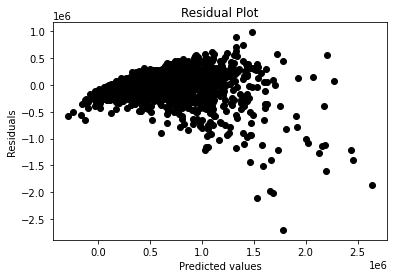

In [99]:
# Creating the residual plot for the model with all predictors
# Plotting the residuals
residuals = y_pred - y_test
plt.scatter(y_pred, residuals, c='black')
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

The diverging cone shaped distribution of the residuals indicates heteroscedasticity present in the data

In [162]:
# Using VIF to check for multicollinearity for the independent variables
def calc_vif(a):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = a.columns
    vif["VIF"] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]

    return(vif)

In [ ]:
calc_vif(X)

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,bedrooms,2.326988e+01
1,bathrooms,2.861065e+01
2,sqft_living,inf
3,sqft_lot,2.377686e+00
4,floors,1.689406e+01
5,waterfront,1.213238e+00
6,view,1.552032e+00
7,condition,3.470546e+01
8,grade,1.474827e+02
9,sqft_above,inf


In [ ]:
# The VIF values above indicate that the variables are highly multicollinear
# Investigating which variables are causing the VIF values to shoot up by playing around with the columns
# The important predictors are also those that are highly correlated
trial = df[['view', 'grade', 'sqft_lot', 'sqft_living', 'bathrooms','bedrooms', 'condition', 'floors', 'sqft_above', 'sqft_living15', 'yr_renovated', 'yr_built']]
calc_vif(trial)

,variables,VIF
0,view,1.298231
1,grade,139.545577
2,sqft_lot,1.201750
3,sqft_living,50.847691
4,bathrooms,24.926076
5,bedrooms,22.950882
6,condition,30.132299
7,floors,16.402394
8,sqft_above,36.570872
9,sqft_living15,26.265918


In [ ]:
# The locational aspect of the data is causing this multicollinearity effect
# lat, lon, zipcode and yr_built are contributing to this

In [67]:
# Running the prediction without the location aspect
# Defining the features and target variable
X = df[['view', 'grade', 'sqft_lot', 'sqft_living', 'bathrooms','bedrooms', 'condition', 'floors', 'sqft_above', 'sqft_living15', 'yr_renovated', 'waterfront']]
y = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 150324.36892346645
Mean Squared Error: 51840801625.43494
Root Mean Squared Error: 227685.75191573787


In [73]:
# Prediction without the highly correlated variables
# Defining the features and target variable
X = df[['view', 'grade', 'sqft_lot', 'sqft_living','bedrooms', 'condition', 'floors', 'yr_renovated', 'waterfront']]
y = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 126384.99491491419
Mean Squared Error: 40673581554.66531
Root Mean Squared Error: 201676.9237038916


Linear regression is sensitive to outliers effect.From the EDA we noticed that most of the variables had outliers. Most of the variables also had a skewed distribution and this could affect our MLR as it assumes data has normal distribution. From the variance inflation values, it is also quite clear that our variables are multicollinear.

There's a pattern between the location(latitude & longitude) and zip code and the year the buildings were built. This is not surprising as geographical patterns definitely influence housing prices. This pattern can be investigated by visualization like maps which can show the areas with the different housing prices.

The model with all the features, had a relatively lower RMSE compared with the others where certain features had not been included. This RMSE will help to compare with the regression methods(that are best suited for data that is heterogenous, has outliers and is multicollinear) implemented below.

**b. Quantile Regression**

In [156]:
# Defining the features and target variable
X = df.drop(['price'], axis=1)
y = df[['price']]

In [157]:
# Splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Computing the R squared score for the linear regression model for comparison purpose to other regression models
y_pred = lin_reg.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred).round(3)
print('R Squared score is {}'.format(r2) )
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R Squared score is 0.697
Root Mean Squared Error: 200558.78731287445


In [158]:
# Fitting the quantile regression to all the variables
mod = smf.quantreg('price ~ sqft_living + grade + sqft_living15 + bedrooms + bathrooms + view + sqft_lot + condition + floors + sqft_above + yr_renovated + yr_built + zipcode + lat + long + sqft_lot15 + waterfront', df)

res = mod.fit(q=.5)
print(res.summary())
y_pred = res.predict(X_test)
print("R2 is :", metrics.r2_score(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4606
Model:                       QuantReg   Bandwidth:                   2.020e+04
Method:                 Least Squares   Sparsity:                    2.755e+05
Date:                Sat, 26 Sep 2020   No. Observations:                21603
Time:                        11:47:03   Df Residuals:                    21585
                                        Df Model:                           17
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -243.8181      4.351    -56.039      0.000    -252.346    -235.290
sqft_living     111.7388      2.988     37.395      0.000     105.882     117.596
grade          8.459e+04   1469.472     57.566      0.000    8.17e+04    8.75e+04
sqft_living15    44.0039      2.322  

In [159]:
# At the 0.25 quantile
mod = smf.quantreg('price ~ sqft_living + grade + sqft_living15 + bedrooms + bathrooms + view + sqft_lot + condition + floors + sqft_above + yr_renovated + yr_built + zipcode + lat + long + sqft_lot15 + waterfront', df)

res = mod.fit(q=.25)
print(res.summary())
y_pred = res.predict(X_test)
print("R2 is :", metrics.r2_score(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4243
Model:                       QuantReg   Bandwidth:                   1.701e+04
Method:                 Least Squares   Sparsity:                    2.930e+05
Date:                Sat, 26 Sep 2020   No. Observations:                21603
Time:                        11:47:35   Df Residuals:                    21585
                                        Df Model:                           17
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       102.9766      4.304     23.924      0.000      94.540     111.413
sqft_living      72.5536      2.786     26.038      0.000      67.092      78.015
grade          7.105e+04   1321.939     53.750      0.000    6.85e+04    7.36e+04
sqft_living15    34.9529      2.039  

In [160]:
# At the 0.75 quantile
mod = smf.quantreg('price ~ sqft_living + grade + sqft_living15 + bedrooms + bathrooms + view + sqft_lot + condition + floors + sqft_above + yr_renovated + yr_built + zipcode + lat + long + sqft_lot15 + waterfront', df)

res = mod.fit(q=.75)
print(res.summary())
y_pred = res.predict(X_test)
print("R2 is :", metrics.r2_score(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.5149
Model:                       QuantReg   Bandwidth:                   1.880e+04
Method:                 Least Squares   Sparsity:                    3.864e+05
Date:                Sat, 26 Sep 2020   No. Observations:                21603
Time:                        11:47:54   Df Residuals:                    21585
                                        Df Model:                           17
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       268.4343      5.344     50.233      0.000     257.960     278.909
sqft_living     136.2925      3.746     36.379      0.000     128.949     143.636
grade          8.707e+04   1894.227     45.968      0.000    8.34e+04    9.08e+04
sqft_living15    33.6089      3.166  

**c. Ridge Regression**

Ridge regression uses the l2 regularization hyperparameter

In [138]:
# Initialising our grid search to get the best hyperparameters to use for ridge regression
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [141]:
# We now use the .fit function to run the model and then use the .best_params_ and .best_scores_ function to determine the models strength. 
search.fit(X,y)
print(search.best_params_)
# {'alpha': 0.01}
print(search.best_score_) 

{'alpha': 0.01}
-41017981981.98589


In [146]:
# Fitting the model with the ridge best parameters and getting its RMSE
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
print("MSE is :", mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print("RMSE is:", np.sqrt(mean_squared_error(y_true=y,y_pred=ridge.predict(X))))

MSE is : 40527040931.81657
RMSE is: 201313.2904996999


**d. Lasso Regression**

In [ ]:
# Standadizing our features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [137]:
# Fitting Lasso Regression on the whole data without splitting
# Creating lasso object
lasso = linear_model.Lasso() 

# Fitting the models
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X)))
print("lasso RMSE:", np.sqrt(mean_squared_error(y, lasso.predict(X)))) 
print("lasso coef:", lasso.coef_) 

# # Creating lasso regression with alpha value
# regr = Lasso(alpha=0.5)

# # Fitting the linear regression
# model = regr.fit(X_std, y)

lasso score: 0.6998548014164134
lasso MSE: 40520723226.41556
lasso RMSE: 201297.59866033067
lasso coef: [-3.57521548e+04  4.10070601e+04  2.85104207e+02  1.27813841e-01
  6.83643907e+03  5.82025983e+05  5.31455788e+04  2.64848206e+04
  9.60249947e+04 -1.03828455e+02 -1.34916554e+02 -2.62192255e+03
  2.02499796e+01 -5.82638107e+02  6.02898235e+05 -2.14428722e+05
  2.16744231e+01 -3.82284344e-01]


In [136]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("lasso RMSE:", np.sqrt(mean_squared_error(y_test, gridlasso.predict(X_test))))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 4.5}
lasso score: 0.6914789138066897
linear score: 0.6914907938969571
lasso MSE: 43846841364.153366
lasso RMSE: 209396.37380851028
linear MSE: 43845152972.47882
lasso best estimator coef: [-3.58781027e+04  4.19546572e+04  2.84335017e+02  1.20549314e-01
  8.47436499e+03  5.40065840e+05  5.40675931e+04  2.69603814e+04
  9.38643948e+04 -1.03393838e+02 -1.28452581e+02 -2.60934690e+03
  1.37523921e+01 -5.55504816e+02  6.06236376e+05 -2.03992815e+05
  2.22223492e+01 -3.83396685e-01]
linear coef: [[-3.58827968e+04  4.19691529e+04  1.12266156e+02  1.20693677e-01
   8.47963919e+03  5.40750463e+05  5.40430199e+04  2.69754687e+04
   9.38527710e+04  6.86733708e+01  4.35927853e+01 -2.60879403e+03
   1.37484107e+01 -5.56142553e+02  6.06527148e+05 -2.04400082e+05
   2.22362313e+01 -3.83162918e-01]]


**e. Elastic Net Regression**

In [127]:
# Normalizing the data and creating our grid 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [163]:
# Fitting the model and getting the best parameters
search.fit(X_train,y_train)
search.best_params_
abs(search.best_score_)
print(search.best_params_)
print(abs(search.best_score_))


{'alpha': 0.001}
40813675410.25102


In [165]:
# Fitting the model with the recommended parameters
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.8)
elastic.fit(X_train,y_train)

y_predict = elastic.predict(X_test)
# Calculating the MSE and RMSE for comparison with the other models
print("MSE is:", mean_squared_error(y_true=y,y_pred=elastic.predict(X))) 
print("RMSE is:", np.sqrt(mean_squared_error(y_true=y,y_pred=elastic.predict(X))))
print("R2 is :", metrics.r2_score(y_test,y_pred))


MSE is: 69277142886.82301
RMSE is: 263205.51454485714
R2 is : 0.6559553628137854


For the quantile regression the model gave the highest R squared score and the lowest RMSE at the 75th percentile. Lasso Regression had a 
lower RMSE compared to Ridge Regression and Elastic Net Regression. Lasso Regression also had a higher R squared accuracy compared to the others meaning it can be deployed to help in predicting housing prices for the compamny.
A further recommendation is to incorporate geographical analysis in the modelling so as to get a clear picture of the spatial trends underlying within the housing prices.
